In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [13]:
# 1. Load Dataset
def load_karate_club_dataset():
    """
    load Zachary's karate club dataset
    Dataset include di networkX
    """
    G = nx.karate_club_graph()
    
    # Node labels (Komunitas setelah split)
    labels = []
    for node in G.nodes():
        club = G.nodes[node]['club']
        labels.append(0 if club == 'Mr. Hi' else 1)
        
    return G, labels

In [3]:
#2. Node2vec Implementation

def train_node2vec(G, dimensions=128, walk_length=30, num_walks=200, p=1, q =1):
    """
    Train Node2vec model
    
    Parameters:
    - dimensions : dimensi embedding
    - walk_lenght : panjang random walks
    - num_walks = Jumlah walks per node
    - p : retrurn parameter
    - q : in-out parameter
    
    """
    
    print("Training Node2Vec model...")
    print(f"Parameters: dimensions={dimensions}, walk_length={walk_length}, num_walks={num_walks}, p={p}, q={q}")
    
    #inisialisasi Node2vec
    
    node2vec = Node2Vec(G, dimensions=dimensions, walk_length = walk_length, num_walks = num_walks, p=p, q=q, workers=4)
    
    #train model
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    
    #get embbeding
    embeddings = np.array([model.wv[str(node)] for node in G.nodes()])
    
    return embeddings,model


In [26]:
# 3. Visualisasi Embedding

def visualize_embbedings(embeddings, labels, title, test_size=0.3, random_state=42):
    """
    Visualisasi embbedings menggunakan t-SNE
    """
    
    #reduce dimensi ke 2D menggunakan t-sne
    tsne = TSNE(n_components=2, random_state=random_state)
    embeddings_2d = tsne.fit_transform(embeddings)
    
    #plot
    plt.figure(figsize=(10,8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:,1], c= labels, cmap='Accent', alpha =0.7, s=100)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("t-SNE dimension 1")
    plt.ylabel("t-SNE dimension 2")
    plt.show()

In [29]:
#4. Klasifikasi Node
def node_classification(embeddings, labels, test_size=0.3, random_state=42):
    """perform node classification menggunakan embbedings"""
    
    #split_data
    X_train, X_test, y_train,y_test = train_test_split(
        embbedings, labels, test_size=test_size, random_state=random_state
    )
    
    print(f"\nTraining set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    #train classifier
    clf= LogisticRegression(random_state=random_state, max_iter=1000)
    clf.fit(X_train, y_train)
    
    #predict
    y_pred = clf.predict(X_test)
    
    #predict
    akurasi = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {akurasi:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return clf, akurasi

In [14]:
# implementasi keseluruhan
#load dataset
G, labels = load_karate_club_dataset()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of communities: {len(set(labels))}")

Number of nodes: 34
Number of edges: 78
Number of communities: 2


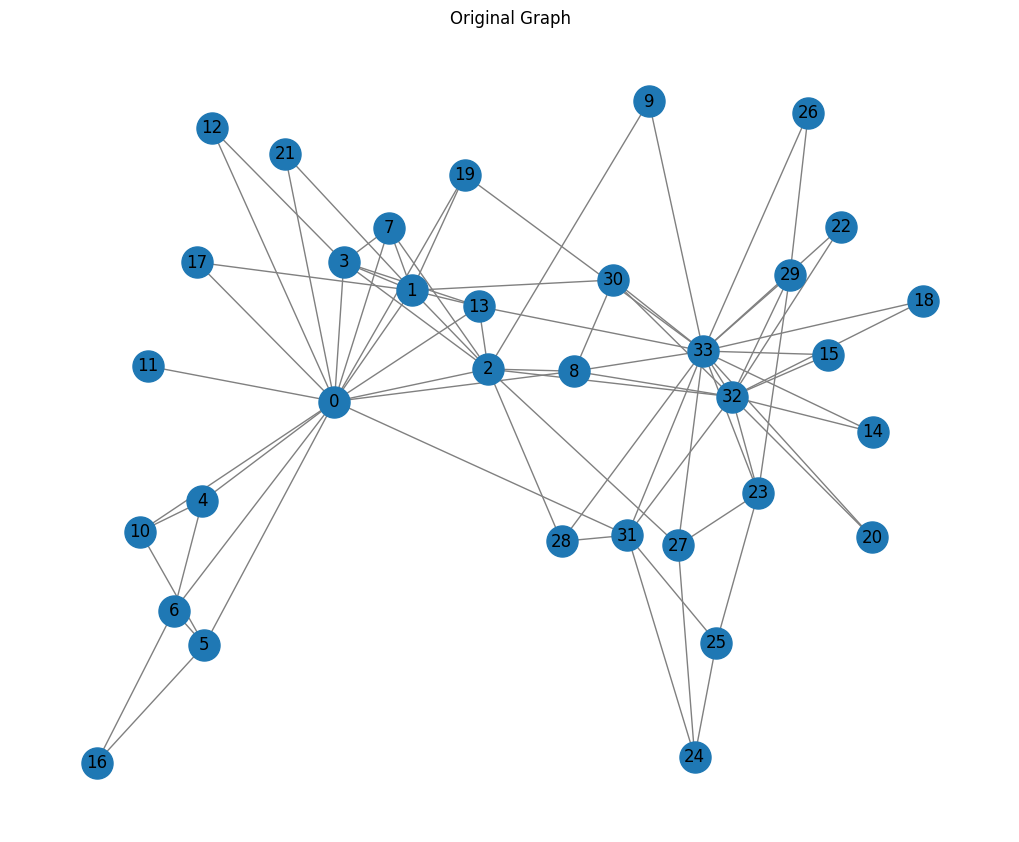

In [16]:
#visualisasi graph
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, cmap='vridis', edge_color="gray")
plt.title("Original Graph")
plt.show()

In [17]:
#Train node2vec
results = []

embbedings,model = train_node2vec(G, dimensions=64, p=1, q= 1)
 


Training Node2Vec model...
Parameters: dimensions=64, walk_length=30, num_walks=200, p=1, q=1


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:02<00:00, 16.87it/s]


In [18]:
print(embbedings)

[[ 0.14231089 -0.01722182  0.0331894  ...  0.07640979 -0.09651373
   0.11782584]
 [-0.08392137 -0.03672436 -0.00851041 ... -0.10643446 -0.18851916
   0.22286853]
 [-0.04102277 -0.09036041  0.00499406 ... -0.12236997 -0.1813745
   0.08232629]
 ...
 [-0.01594863 -0.02255108  0.3496605  ... -0.320798    0.04141397
  -0.19499649]
 [-0.05493423  0.13149676  0.30505824 ... -0.11005008 -0.02157456
  -0.08794861]
 [-0.00891715  0.18314125  0.23654242 ... -0.1605492  -0.06961664
  -0.19565856]]


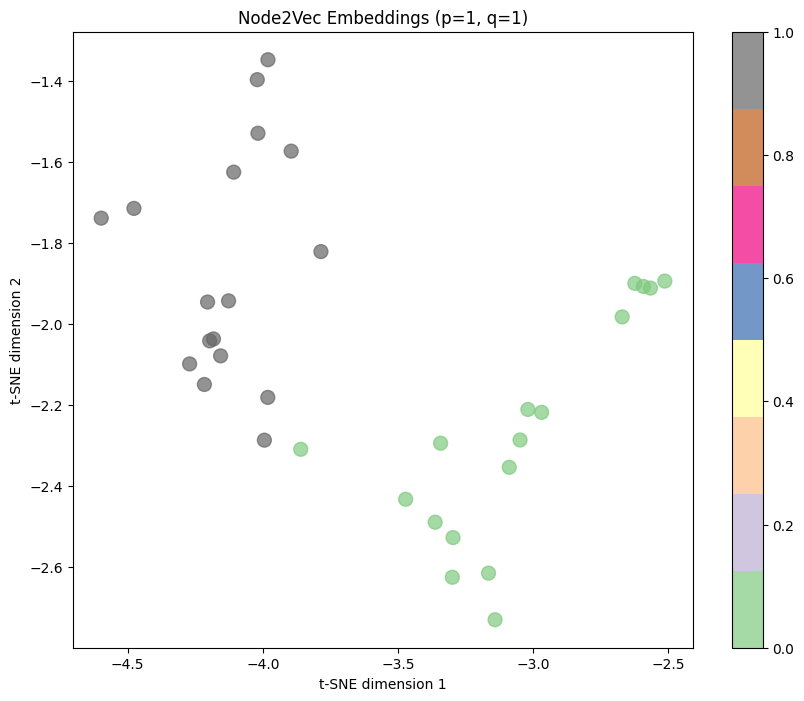

In [27]:
#visualisasi node2 vec
visualize_embbedings(embbedings, labels, "Node2Vec Embeddings (p=1, q=1)")

In [30]:
#train model klasifikasi
clf,acc = node_classification(embbedings, labels)


Training set size: 23
Test set size: 11

Accuracy: 0.9091

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11


Confusion Matrix:
[[4 1]
 [0 6]]
